<a href="https://colab.research.google.com/github/jjpal/dk122022_data_dive/blob/main/SNAP__SVI__Map_Meal_gap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Identifying potential eligibility-enrollment gap localities

   ### Compare SNAP benefit uptake and measures of social vulnerability 

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

### SUPPLEMENTAL NUTRITION ASSISTANCE PROGRAM (SNAP)

Column Headers

Substate, PersonsPublic, PersonsNonPublic, PersonsTotal,HouseholdsPublicAssistance, HouseholdsNonPublicAssistance, HouseholdsTotal,Issuance, month, year, countyFIPS, countyNAME, stateFIPS, stateNAME

In [3]:
# Processed Merged SNAP data
snap_merge_url = 'https://raw.githubusercontent.com/michaelbbryan/tools-and-kaggles/main/DataDive2022/snapmergecounty.csv'


In [4]:
# Load SNAP dataset
snap_merge_df = pd.read_csv(snap_merge_url)

In [5]:
# Only select year 2020 to match up with the other datasets
snap_county_2020_df = snap_merge_df[snap_merge_df['year'] == 2020]

In [6]:
# groupby on multiple columns and calculate a sum over each combination group.
snap_county_2020_dfnew = snap_county_2020_df.groupby(['countyFIPS','year']).sum().reset_index()

In [7]:
# display sample of dataset
snap_county_2020_df.sample(3)

,Substate,PersonsPublic,PersonsNonPublic,PersonsTotal,HouseholdsPublicAssistance,HouseholdsNonPublicAssistance,HouseholdsTotal,Issuance,month,year,countyFIPS,countyNAME,stateFIPS,stateNAME
179455,3908102 OH EBT JEFFERSON CO DHS,1719.0,11892.0,13611.0,1398.0,5671.0,7069.0,2394512.0,JUL,2020,39081,Jefferson County,39,OHIO
88470,4714301 TN EBT RHEA,732.0,4956.0,5688.0,557.0,2235.0,2792.0,676099.0,JAN,2020,47143,Rhea County,47,TENNESSEE
178568,1919101 IA EBT WINNESHIEK CO DHS,85.0,720.0,805.0,74.0,341.0,415.0,144345.0,JUL,2020,19191,Winneshiek County,19,IOWA


In [8]:
snap_county_2020_df.month.value_counts()

JAN    2626
JUL    2626
Name: month, dtype: int64

### Social Vulnerability Indicators (selected columnss)


In [9]:
# social vulnerability indicators for 2020
svi2020_url = 'https://raw.githubusercontent.com/jjpal/dk122022_data_dive/main/SVI2020_US_COUNTY.csv'

# load svi dataset with selected columns
svi_2020_df = pd.read_csv(svi2020_url, usecols = ['STATE','ST_ABBR','COUNTY','FIPS','RPL_THEME1', 'RPL_THEME2', 'RPL_THEME3', 'RPL_THEME4', 'RPL_THEMES'])

# display sample of dataset
svi_2020_df.sample(3)

,STATE,ST_ABBR,COUNTY,FIPS,RPL_THEME1,RPL_THEME2,RPL_THEME3,RPL_THEME4,RPL_THEMES
1706,Nebraska,NE,Keya Paha,31103,0.0500,0.1143,0.0029,0.0057,0.0051
253,Colorado,CO,Chaffee,8015,0.2342,0.7346,0.4535,0.8724,0.5509
2048,Ohio,OH,Athens,39009,0.6808,0.0169,0.3355,0.9659,0.5439


In [10]:
# merge previously merged SNAP data with svi2020 indicators
SNAP_SVI = pd.merge(snap_county_2020_dfnew, svi_2020_df,left_on='countyFIPS',right_on='FIPS',how='inner')

### Map Meal Gap Data 

In [11]:
# map_meal_gap_data - with County sheet name
map_meal_gap_2020_df = pd.read_excel(io='https://github.com/jjpal/dk122022_data_dive/blob/main/MMG2022_2020-2019Data_ToShare.xlsx?raw=true', sheet_name ='County')

In [12]:
# separate County and State into different columns
map_meal_gap_2020_df[['County', 'States']] = map_meal_gap_2020_df['County, State'].str.split(pat = ',', expand = True)

map_meal_gap_2020_df = map_meal_gap_2020_df[map_meal_gap_2020_df['Year'] == 2020]
map_meal_gap_2020_df.drop('County, State', axis=1, inplace=True)

In [13]:
# change the datatype to datetime
map_meal_gap_2020_df['Year'] = pd.to_datetime(map_meal_gap_2020_df['Year'], format='%Y')                            

In [14]:
# change the datatype
map_meal_gap_2020_df['FIPS'] = map_meal_gap_2020_df['FIPS'].astype(int)

In [15]:
# combine previously merged snap_svi df with map meal datase
map_svi_snap = pd.merge(SNAP_SVI, map_meal_gap_2020_df,left_on='FIPS',right_on='FIPS',how='inner')

In [16]:
print(map_svi_snap.shape)
print(map_svi_snap.columns)

(2507, 42)
Index(['countyFIPS', 'year', 'PersonsPublic', 'PersonsNonPublic',
       'PersonsTotal', 'HouseholdsPublicAssistance',
       'HouseholdsNonPublicAssistance', 'HouseholdsTotal', 'Issuance',
       'stateFIPS', 'STATE', 'ST_ABBR', 'COUNTY', 'FIPS', 'RPL_THEME1',
       'RPL_THEME2', 'RPL_THEME3', 'RPL_THEME4', 'RPL_THEMES', 'State', 'Year',
       'Overall Food Insecurity Rate (1 Year)',
       '# of Food Insecure Persons Overall (1 Year)',
       'Food Insecurity Rate among Black Persons (all ethnicities)',
       'Food Insecurity Rate among Hispanic Persons (any race)',
       'Food Insecurity Rate among White, non-Hispanic Persons ',
       'Low Threshold in state', 'Low Threshold Type',
       'High Threshold in state', 'High Threshold Type',
       '% FI ≤ Low Threshold', '% FI Btwn Thresholds', '% FI > High Threshold',
       'Child Food Insecurity Rate (1 Year)',
       '# of Food Insecure Children (1 Year)',
       '% food insecure children in HH w/ HH incomes below 1

In [17]:
# FIPS CODE B11001 from census households per county
census_table_url = 'https://raw.githubusercontent.com/michaelbbryan/tools-and-kaggles/main/DataDive2022/juanita.csv'

# load svi dataset with selected columns
census_FIPS_df = pd.read_csv(census_table_url, usecols = ['countyFIPS', 'HHCount'])

# display dataframe
census_FIPS_df.sample(3) 

,countyFIPS,HHCount
399,13023,4250.0
354,12069,137446.0
318,10003,209431.0


In [18]:
# merge FIPS column to existing merged data and assign to a new df
census_map_svi_snap = pd.merge(census_FIPS_df, map_svi_snap,left_on='countyFIPS',right_on='countyFIPS',how='inner')

# display dataframe
census_map_svi_snap.sample(3)

,countyFIPS,HHCount,year,PersonsPublic,PersonsNonPublic,PersonsTotal,HouseholdsPublicAssistance,HouseholdsNonPublicAssistance,HouseholdsTotal,Issuance,...,% FI > High Threshold,Child Food Insecurity Rate (1 Year),# of Food Insecure Children (1 Year),% food insecure children in HH w/ HH incomes below 185 FPL,% food insecure children in HH w/ HH incomes above 185 FPL,Cost Per Meal (1 Year),Weighted weekly $ needed by FI,Weighted Annual Food Budget Shortfall,County,States
799,20053,2390.0,2020,67.0,439.0,506.0,40.0,187.0,227.0,52214.0,...,0.409,0.131,150.0,0.79,0.21,3.02,16.013291,262000.0,Ellsworth County,Kansas
1704,40117,6260.0,2020,28.0,5254.0,5282.0,10.0,2335.0,2345.0,762775.0,...,0.345,0.192,740.0,0.79,0.22,3.24,17.173419,1198000.0,Pawnee County,Oklahoma
2234,48479,76382.0,2020,544.0,139389.0,139933.0,148.0,53239.0,53387.0,20145107.0,...,0.055,0.252,22770.0,0.88,0.12,2.71,14.368212,19386000.0,Webb County,Texas


In [19]:
# calculation SNAP HouseholdsTotal/#census_household
census_map_svi_snap['HH_ratio'] = census_map_svi_snap['HouseholdsTotal'] / census_map_svi_snap['HHCount']

In [20]:
# Columns of 4 table merge of selected columns
census_map_svi_snap.columns

Index(['countyFIPS', 'HHCount', 'year', 'PersonsPublic', 'PersonsNonPublic',
       'PersonsTotal', 'HouseholdsPublicAssistance',
       'HouseholdsNonPublicAssistance', 'HouseholdsTotal', 'Issuance',
       'stateFIPS', 'STATE', 'ST_ABBR', 'COUNTY', 'FIPS', 'RPL_THEME1',
       'RPL_THEME2', 'RPL_THEME3', 'RPL_THEME4', 'RPL_THEMES', 'State', 'Year',
       'Overall Food Insecurity Rate (1 Year)',
       '# of Food Insecure Persons Overall (1 Year)',
       'Food Insecurity Rate among Black Persons (all ethnicities)',
       'Food Insecurity Rate among Hispanic Persons (any race)',
       'Food Insecurity Rate among White, non-Hispanic Persons ',
       'Low Threshold in state', 'Low Threshold Type',
       'High Threshold in state', 'High Threshold Type',
       '% FI ≤ Low Threshold', '% FI Btwn Thresholds', '% FI > High Threshold',
       'Child Food Insecurity Rate (1 Year)',
       '# of Food Insecure Children (1 Year)',
       '% food insecure children in HH w/ HH incomes below 1

In [21]:
census_map_svi_snap.head(3)

,countyFIPS,HHCount,year,PersonsPublic,PersonsNonPublic,PersonsTotal,HouseholdsPublicAssistance,HouseholdsNonPublicAssistance,HouseholdsTotal,Issuance,...,Child Food Insecurity Rate (1 Year),# of Food Insecure Children (1 Year),% food insecure children in HH w/ HH incomes below 185 FPL,% food insecure children in HH w/ HH incomes above 185 FPL,Cost Per Meal (1 Year),Weighted weekly $ needed by FI,Weighted Annual Food Budget Shortfall,County,States,HH_ratio
0,1001,21559.0,2020,1977.0,13108.0,15085.0,1064.0,5764.0,6828.0,2219777.0,...,0.181,2380.0,0.71,0.29,3.22,17.092792,4184000.0,Autauga County,Alabama,0.316712
1,1003,84047.0,2020,3723.0,37358.0,41081.0,2229.0,16252.0,18481.0,6120282.0,...,0.120,5650.0,0.82,0.18,3.72,19.723135,16195000.0,Baldwin County,Alabama,0.219889
2,1005,9322.0,2020,1607.0,9683.0,11290.0,960.0,4280.0,5240.0,1660768.0,...,0.334,1740.0,0.82,0.18,3.19,16.956475,2505000.0,Barbour County,Alabama,0.562111


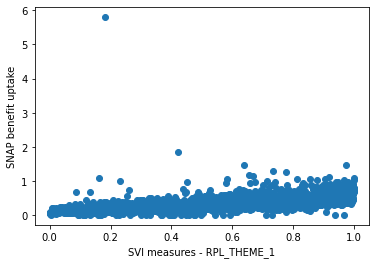

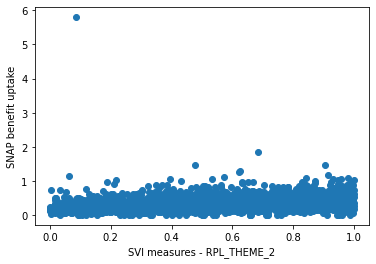

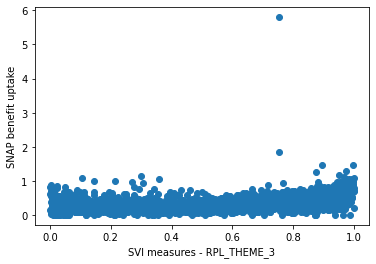

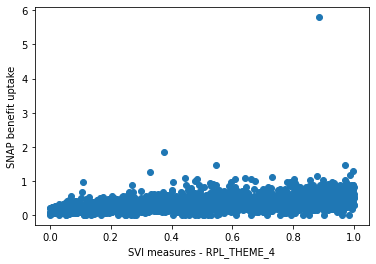

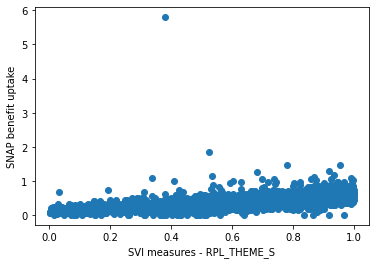

In [44]:
y = census_map_svi_snap['HH_ratio']

for theme in ['1','2','3','4','S']:
      x = census_map_svi_snap['RPL_THEME' + theme]
      plt.scatter(x, y)
      plt.xlabel('SVI measures - RPL_THEME_' + theme)
      plt.ylabel('SNAP benefit uptake')
      plt.show()

In [48]:
print(f"RPL_THEME x min {x.min()} | x max {x.max()}") 
print(f"HH_ratio  y min {y.min()} | y max {y.max()}")  


RPL_THEME x min 0.0013 | x max 1.0
HH_ratio  y min 0.0 | y max 5.79437800900761


In [ ]:
# regression to see how they predict together. 